In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming Ball and Path are defined elsewhere (or combined into a single class)

class Baton:  # No inheritance needed if Ball and Path functionalities are combined
    def __init__(self, mass, radius, v0, theta, L, w):
        self.mass = mass
        self.radius = radius
        self.v0 = v0
        self.theta = theta
        self.L = L
        self.w = w

    def get_center_of_mass(self):
        # Assuming getX and getY are defined in Ball or Path (or combined class)
        return np.array([self.getX(), self.getY()])

    def get_point_a(self, t):
        center = self.get_center_of_mass()
        return center + 0.5 * self.L * np.array([np.cos(self.w * t), np.sin(self.w * t)])

    def get_point_b(self, t):
        center = self.get_center_of_mass()
        return center - 0.5 * self.L * np.array([np.cos(self.w * t), np.sin(self.w * t)])

    def position(self, max_time=10.0):
        t = 0.0
        count = 1

        plt.figure()

        while t < max_time:
            center = self.get_center_of_mass()
            point_a = self.get_point_a(t)
            point_b = self.get_point_b(t)

            # Clear the plot for better animation (optional)
            plt.clf()

            plt.plot([center[0], point_a[0]], [center[1], point_a[1]], '-or', label='M1')  # M1
            plt.plot([center[0], point_b[0]], [center[1], point_b[1]], '-ob', label='M2')  # M2
            plt.plot([point_a[0], point_b[0]], [point_a[1], point_b[1]], 'm', label='Baton revolving')
            plt.plot(center[0], center[1], '-ok', label='COM')  # COM

            t += 0.02
            count += 1

            plt.pause(0.001)  # Short pause for animation

        plt.legend()
        plt.show()

# Example usage
baton = Baton(0.5, 0.4, 15.0, 45.0, 2.5, 22.0)
baton.position()


AttributeError: 'Baton' object has no attribute 'getX'

<Figure size 640x480 with 0 Axes>

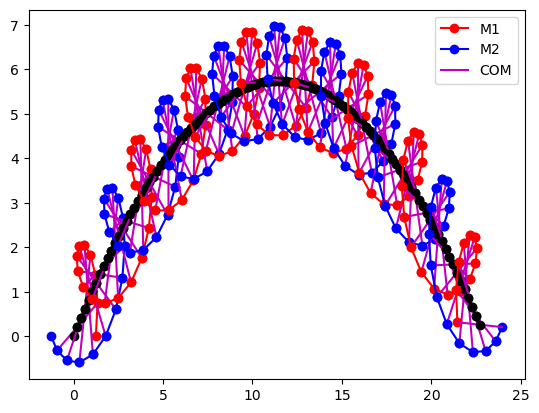

In [2]:
import math
from pylab import *
import numpy
from time import sleep

class Ball:
    def __init__(self, mass, radius):
        self.m = mass
        self.r = radius

    def getM1(self):
        return self.m

    def getR(self):
        return self.r

    def getI1(self):
        return (2.0/5.0) * self.m * (self.r) ** 2

class Path:
    def __init__(self, v0, theta):
        self.g = 9.8
        self.v0 = v0
        self.theta = theta
        self.v0x = self.v0 * math.cos(self.theta * math.pi / 180.0)
        self.v0y = self.v0 * math.sin(self.theta * math.pi / 180.0)

    # this tells the distance
    def getX(self, t):
        self.t = t
        return self.v0x * self.t

    # this tells the distance
    def getY(self, t):
        self.t = t
        return self.v0y * self.t - 0.5 * self.g * t ** 2

class Baton(Ball, Path):
    def __init__(self, mass, radius, v0, theta, L1, w1):
        Ball.__init__(self, mass, radius)
        Path.__init__(self, v0, theta)
        self.L = L1
        self.w = w1

    def getM(self):
        return 2.0 * self.getM1()
    # multiply by 2 cause 2 dumbell / balls

    def getI(self):
        return (2 * self.getI1() + 0.5 * self.getM1() * self.L ** 2)

    def getXa(self, t):
        return self.getX(t) + 0.5 * self.L * cos(self.w * t)

    def getYa(self, t):
        return self.getY(t) + 0.5 * self.L * sin(self.w * t)

    def getXb(self, t):
        return self.getX(t) - 0.5 * self.L * cos(self.w * t)

    def getYb(self, t):
        return self.getY(t) - 0.5 * self.L * sin(self.w * t)

    def position(self):
        t = 0.0
        count = 1
        xao = self.getXa(t)
        yao = self.getYa(t)
        xbo = self.getXb(t)
        ybo = self.getYb(t)
        xco = self.getX(t)
        yco = self.getY(t)
        figure()
        t += 0.02
        while (self.getYa(t) >= 0.0):
            xa = self.getXa(t)
            ya = self.getYa(t)
            xb = self.getXb(t)
            yb = self.getYb(t)
            xc = self.getX(t)
            yc = self.getY(t)
            draw()
            plot([xao, xa], [yao, ya], '-or')
            plot([xbo, xb], [ybo, yb], '-ob')
            plot([xa, xb], [ya, yb], 'm')
            plot([xco, xc], [yco, yc], '-ok')
            xao = xa
            yao = ya
            xbo = xb
            ybo = yb
            xco = xc
            yco = yc
            t += 0.02
            count += 1
            # print(count, t)
            legend(['M1', 'M2', 'COM'], loc='upper right')
        show()

baton = Baton(0.5, 4, 15.0, 45.0, 2.5, 22.0)
baton.position()
 